In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def predict(w: np.ndarray, x: np.ndarray):
    """
    Input:
        w: wieght vector (d + 1): np.ndarray
        x: input features (n, d): np.ndarray
    Output:
        y: output (n): np.ndarray
    """
    x = np.pad(x, pad_width = ((0, 0), (0, 1)), constant_values=1)
    return np.dot(w, np.swapaxes(x, 0, 1))

In [43]:
def mse_loss(w, X, Y):
    """
    Input:
        w: wieght vector (d + 1): np.ndarray
        X: list of n samples (n, d): np.ndarray
        Y: list of n results (n): np.ndarray
    Output:
        MSE loss: float
    """
    predicted = predict(w, X)
    loss = np.mean((Y - predicted) ** 2)
    return loss

mse_loss([2, 3, 1], [[1, 1], [2, 2], [3, 3]], [7, 9, 16]) # mse_loss = 5/3

1.6666666666666667

In [37]:
def train(train_X, train_Y, step_size=.0001, iterations=100000):
    """
    Input:
        train_X: training samples (n, d): np.ndarray
        train_Y: training labels (n): np.ndarray
    Output:
        w: wieght vector (d + 1): np.ndarray
    """
    n, d = train_X.shape
    X = np.pad(train_X, pad_width = ((0, 0), (0, 1)), constant_values=1)
    w = np.random.rand(d + 1)
    for i in range(iterations):
        #learning rate scheduler
        if i == iterations/2:
            iterations = iterations/2
            step_size = step_size/5
        
        predicted = np.dot(X, w.T).T # predicted values from model
        grad = 2/n * np.array([np.sum((predicted - train_Y) * X[:, j]) for j in range(d+1)]) # gradient calculation
        w = w - (grad * step_size) #gradient update
    return w

In [38]:
weights = np.array([3, 1, 11])
bias = 20
train_X = np.random.randint(-100, 100, (100, 3))
train_Y = np.dot(train_X, weights.T).T + bias

train(train_X, train_Y)

array([ 3.0000001 ,  0.99999998, 11.00000001, 19.99987726])

[1.50190568 3.99895066]


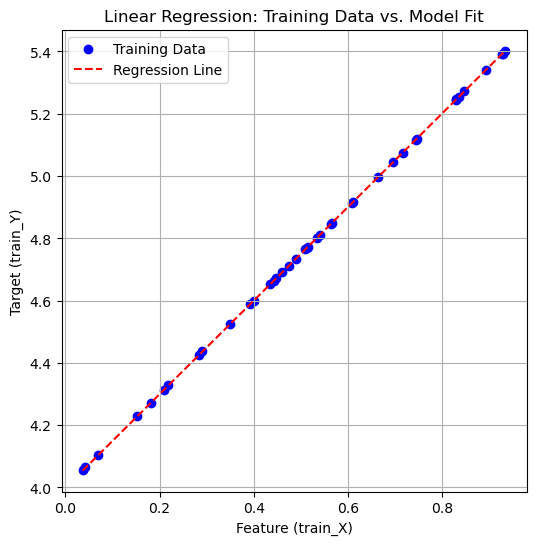

In [44]:

train_X = np.random.rand(40, 1)

# Generate target values (for example, a linear function with some noise)
true_w = np.array([1.5])  # True weights for features
bias = 4  # Bias term
train_Y = np.dot(true_w, np.swapaxes(train_X, 0, 1)) + bias  # Generate outputs

# Train the model (assuming `train` function returns weight vector `w`)
w = train(train_X, train_Y, step_size=0.001, iterations=100000)
print(w)
# Generate predictions using the trained model
x_vals = np.linspace(train_X.min(), train_X.max(), 100)  # Smooth range for line
x_vals = x_vals.reshape(-1, 1)
X_pad = np.pad(x_vals, pad_width=((0, 0), (0, 1)), constant_values=1)  # Pad for bias
y_vals = np.dot(w, np.swapaxes(X_pad, 0, 1))  # Compute predictions

# Plot
plt.figure(figsize=(6,6))
plt.scatter(train_X, train_Y, color='blue', label='Training Data')  # Actual data points
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Regression Line')  # Model predictions

# Labels and Title
plt.xlabel("Feature (train_X)")
plt.ylabel("Target (train_Y)")
plt.title("Linear Regression: Training Data vs. Model Fit")
plt.legend()
plt.grid(True)
plt.show()
